<a href="https://colab.research.google.com/github/blancavazquez/Analisis-datos-masivos-2024/blob/main/notebooks/1_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reducción de dimensionalidad mediante descomposición de valores singulares (SVD)

La descomposición de valores singulares (SVD, por sus siglas en inglés) es un método de descomposición de matrices que ha sido aplicado en la reducción de dimensionalidad.

Una SVD de una matriz es la factorización del tipo:

$
\boldsymbol{A} = U{\Sigma}V^T
$

Donde:
- A es una matriz real de tamaño m x n (es la matriz que se desea descomponer)
- U es una matriz ortogonal de tamaño m x m
- ${\Sigma}$ es una matriz diagonal de tamaño m x n
- V es una matriz ortogonal de tamaño n x n


Recordemos que:
- Los elementos de la matriz ${\Sigma}$ se les conoce como valores singulares de la matriz A.
- Las columnas de la matriz U son llamados vectores singulares a la izquierda de A.
- Las columnas de la matriz V son llamados vectores singulares a la derecha de A.


La descomposición de valores singulares tiene múltiples aplicaciones en estadísticas, aprendizaje de máquinas y en las ciencias computacionales:
- Compresión de imágenes
- Mínimos cuadrados
- Procesamiento de señales
- Clasificación de textos


En esta libreta realizaremos tres actividades:
- Cálculo de la SVD dada la matriz A y su reconstrucción a partir de las matrices obtenidas de la SVD
- Compresión de imágenes
- Modelado de tópicos

## 1) Descomposición de valores singulares de la matriz A
Dada una matriz A calcular su descomposición en valores singulares y posteriormente reconstruirla.

In [1]:
#Carga de bibliotecas de numpy y scipy
from numpy import array
from scipy.linalg import svd
#Definimos la matriz A
A = array([[5,1],[2,-2],[4,9]])
print(A)

[[ 5  1]
 [ 2 -2]
 [ 4  9]]


In [2]:
#Descomposición de la matriz A
U, Sigma, VT = svd(A)
print("Matriz U:\n",U)
print("Matriz Sigma: \n",Sigma)
print("Matriz VT:\n",VT)

Matriz U:
 [[ 0.32743953  0.78898129 -0.51989603]
 [-0.06818241  0.56852442  0.81983605]
 [ 0.94240889 -0.23299896  0.23995201]]
Matriz Sigma: 
 [10.38265511  4.81668691]
Matriz VT:
 [[ 0.50762241  0.86157965]
 [ 0.86157965 -0.50762241]]


### Reconstrucción de la matriz original

In [3]:
# Reconstruir la matriz A, a partir de las matrices U, Sigma y VT.
from numpy import array
from scipy.linalg import svd
from numpy import diag
from numpy import dot
from numpy import zeros

#Definimos la matriz A
A = array([[5,1],[2,-2],[4,9]])
print(A)

[[ 5  1]
 [ 2 -2]
 [ 4  9]]


In [4]:
#Descomposición de la matriz A
U, Sigma, VT = svd(A)
print("Matriz U:\n",U)
print("Matriz Sigma: \n",Sigma)
print("Matriz VT:\n",VT)

Matriz U:
 [[ 0.32743953  0.78898129 -0.51989603]
 [-0.06818241  0.56852442  0.81983605]
 [ 0.94240889 -0.23299896  0.23995201]]
Matriz Sigma: 
 [10.38265511  4.81668691]
Matriz VT:
 [[ 0.50762241  0.86157965]
 [ 0.86157965 -0.50762241]]


In [5]:
# Creamos una matriz diagonal de tamano m x n
sigma_diagonal = zeros((A.shape[0], A.shape[1]))
print(sigma_diagonal)

[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [6]:
# Llenamos la matriz sigma_diagonal con los valores singulares (Sigma)
sigma_diagonal[:A.shape[1], :A.shape[1]] = diag(Sigma)
print(sigma_diagonal)

[[10.38265511  0.        ]
 [ 0.          4.81668691]
 [ 0.          0.        ]]


In [7]:
#Reconstruimos la matriz original
B = U.dot(sigma_diagonal.dot(VT))
print("Matriz reconstruida a partir de la factorización de A:\n", B)

Matriz reconstruida a partir de la factorización de A:
 [[ 5.  1.]
 [ 2. -2.]
 [ 4.  9.]]


## 2) Compresión de imágenes
Dada una imagen, buscamos minimizar / comprimir su tamaño, de tal forma que, la nueva imagen a generar tenga una calidad aceptable con respecto a la original.

#### Ejercicio 1

In [8]:
#Carga de bibliotecas
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
from PIL import Image
from scipy.linalg import svd

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


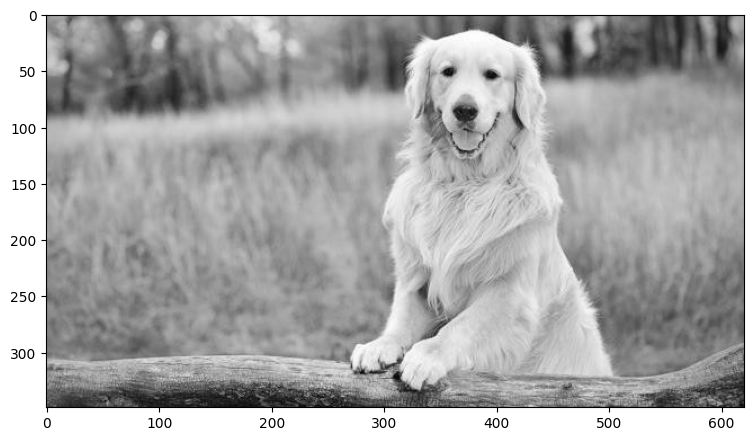

In [10]:
#Cargamos la imagen original y la convertimos a escala de grises
path_imagen = Image.open('/content/drive/MyDrive/Colab Notebooks/images/perrito.jpg')
imagen_grises = path_imagen.convert('LA') #convertir en escala de grises.
plt.figure(figsize=(9, 6))
plt.imshow(imagen_grises);

In [11]:
#Convertimos la imagen a una matrix de numpy.
imagen_matriz = np.array(list(imagen_grises.getdata(band=0)), float)
imagen_matriz.shape = (imagen_grises.size[1], imagen_grises.size[0])
print("Tamaño de la matriz: ",imagen_matriz.shape)

Tamaño de la matriz:  (349, 620)


In [12]:
imagen_matriz = np.matrix(imagen_matriz)
print(imagen_matriz)

[[139. 142. 147. ... 153. 150. 147.]
 [142. 145. 149. ... 158. 155. 152.]
 [143. 146. 150. ... 162. 160. 159.]
 ...
 [ 95.  90.  71. ...  12.  21.  33.]
 [ 89.  86.  62. ...   9.  11.  20.]
 [ 81.  90.  61. ...  26.  24.  32.]]


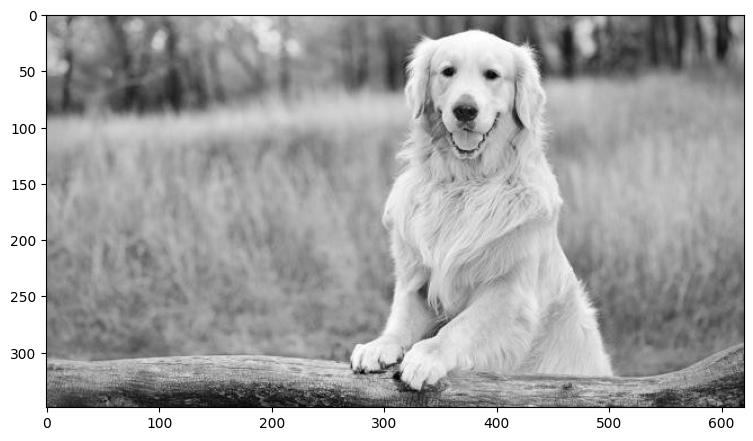

In [13]:
#Visualizamos la imagen, a partir de la matriz creada
plt.figure(figsize=(9,6))
plt.imshow(imagen_matriz, cmap='gray');

In [14]:
#Hacemos la SVD de la matriz creada
U, Sigma, VT = svd(imagen_matriz)

In [15]:
print("Matriz U:\n",U.shape,"\n",U)

Matriz U:
 (349, 349) 
 [[ 4.66453497e-02  4.71035473e-02  1.04171979e-01 ... -8.14650666e-02
  -3.01645367e-02 -1.90980573e-02]
 [ 4.64661676e-02  4.54541786e-02  1.03832559e-01 ...  1.53452938e-01
   7.50300685e-02  4.03706119e-02]
 [ 4.61927983e-02  4.39443266e-02  1.04093597e-01 ... -6.42218574e-02
  -9.80481630e-02 -4.59091133e-02]
 ...
 [ 2.82562039e-02 -5.80693172e-02 -7.24750810e-02 ... -2.36844998e-03
   8.29488354e-05 -1.73070323e-03]
 [ 2.64237850e-02 -4.49460442e-02 -8.23364676e-02 ...  1.72157919e-03
   7.83842522e-04 -7.03369049e-05]
 [ 2.42839305e-02 -3.09860794e-02 -7.42156800e-02 ... -4.75168148e-04
   1.33970368e-03  3.42884675e-04]]


In [16]:
print("Matriz Sigma: \n",Sigma.shape,"\n",Sigma)

Matriz Sigma: 
 (349,) 
 [7.34932690e+04 6.92700825e+03 6.62280099e+03 4.84035576e+03
 4.05432445e+03 3.21925090e+03 2.90195518e+03 2.73113301e+03
 2.64858836e+03 2.40937718e+03 2.18335458e+03 2.08427310e+03
 1.75642505e+03 1.58149855e+03 1.37230756e+03 1.33598470e+03
 1.30818116e+03 1.20179939e+03 1.13074206e+03 1.12103259e+03
 1.01629296e+03 1.01374845e+03 9.29498890e+02 9.11822299e+02
 8.80504281e+02 8.68822890e+02 8.28727982e+02 8.06479634e+02
 7.72791283e+02 7.42857921e+02 7.36016221e+02 7.25894674e+02
 6.98359350e+02 6.81538801e+02 6.69443646e+02 6.53006633e+02
 6.29291296e+02 6.20507329e+02 5.98322413e+02 5.89482207e+02
 5.83442667e+02 5.57359272e+02 5.52184374e+02 5.44365691e+02
 5.42865728e+02 5.26583072e+02 5.01469213e+02 4.97976175e+02
 4.94395326e+02 4.72667463e+02 4.65460575e+02 4.57087508e+02
 4.47138755e+02 4.41567406e+02 4.33432049e+02 4.24776152e+02
 4.19711020e+02 4.08725002e+02 3.99086575e+02 3.96119222e+02
 3.90758059e+02 3.83925409e+02 3.77776274e+02 3.71358725e+02

In [17]:
print("Matriz VT:\n",VT.shape,"\n",VT)

Matriz VT:
 (620, 620) 
 [[ 3.60028207e-02  3.62354809e-02  3.62676734e-02 ...  3.48852718e-02
   3.47222954e-02  3.46341151e-02]
 [ 5.11086130e-02  5.24031002e-02  5.42301941e-02 ...  1.62121638e-02
   1.76647712e-02  1.91711585e-02]
 [ 2.35428082e-02  2.02467526e-02  1.86615355e-02 ...  2.54693205e-02
   2.50473234e-02  2.51510389e-02]
 ...
 [-4.47237528e-02  2.71623870e-03  1.75077915e-02 ...  5.10698343e-01
  -1.57583151e-01 -6.66319852e-02]
 [-8.93184983e-02  6.23716141e-02 -3.98247434e-05 ... -1.90503518e-01
   6.01436621e-01 -1.99322795e-01]
 [-2.91309999e-02  2.54528337e-02 -5.59101886e-02 ... -6.75977935e-02
  -2.29459260e-01  4.51433069e-01]]


In [18]:
print("Total de valores singulares de Sigma:",Sigma.shape)

Total de valores singulares de Sigma: (349,)


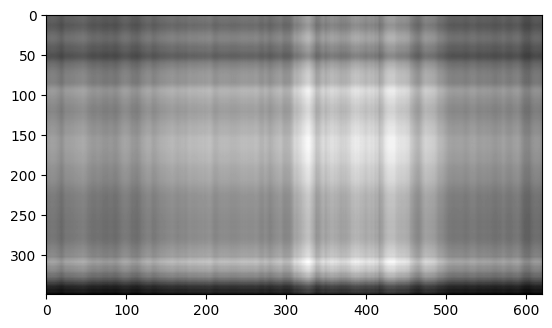

In [19]:
#Reconstruimos la imagen original: usando la 1ra columna de U, la 1era fila de VT y el 1er valor singular
imagen_reconstruida = np.matrix(U[:, :1]) * np.diag(Sigma[:1]) * np.matrix(VT[:1, :])
plt.imshow(imagen_reconstruida, cmap='gray');

Entre menor número de valores singulares, la imagen puede ser poco nítida. Recordemos, los valores singulares más pequeños (Sigma) provienen de las partes de la imagen con menor interés.

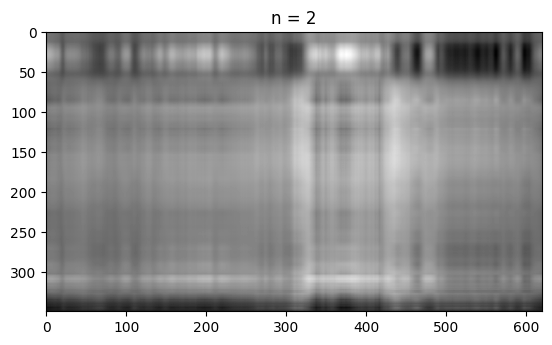

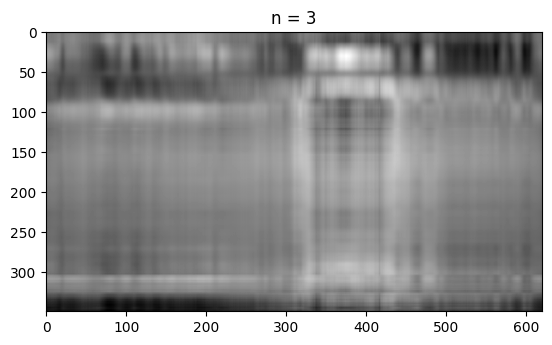

In [20]:
#Exploramos usando la 2da y 3ras columnas de U, filas de VT y valores singulares
for i in range(2, 4):
    reconstimg = np.matrix(U[:, :i]) * np.diag(Sigma[:i]) * np.matrix(VT[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

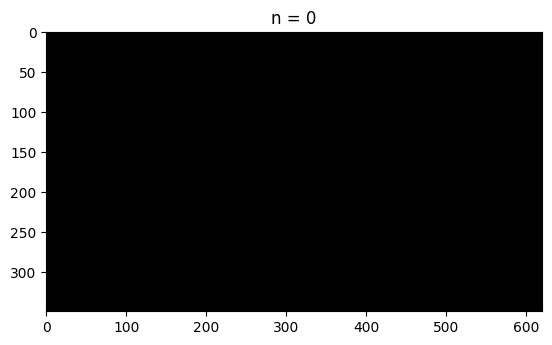

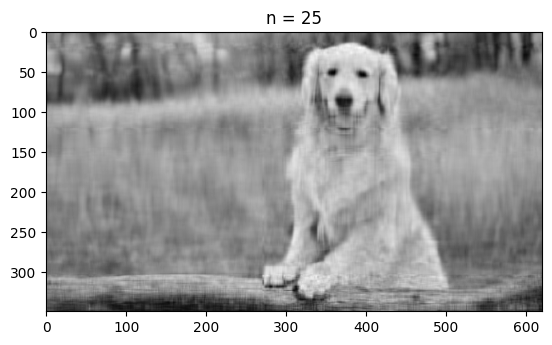

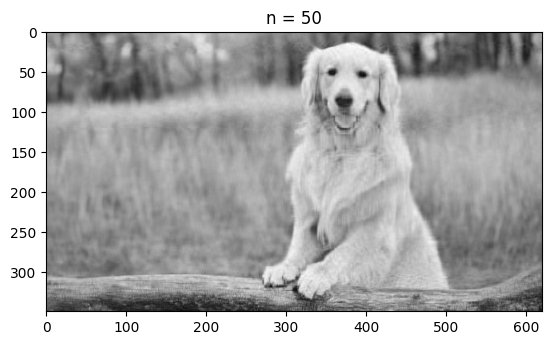

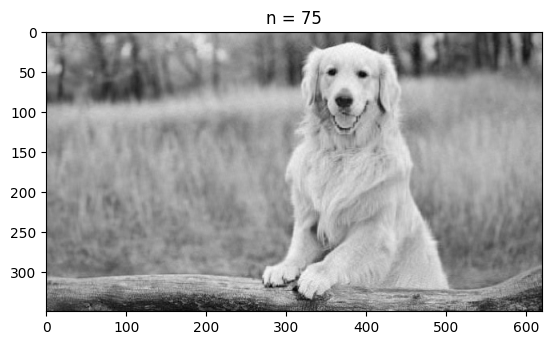

In [21]:
#Generamos un ciclo para reconstruir la imagen utilizando n vectores.
for i in range(0, 100, 25):
    reconstimg = np.matrix(U[:, :i]) * np.diag(Sigma[:i]) * np.matrix(VT[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

In [22]:
#Relación de compresión de la imagen: r = (n+m)k/nm
r = (imagen_matriz.shape[0]+imagen_matriz.shape[1])*75 /(imagen_matriz.shape[0]*imagen_matriz.shape[1])*100
print("% de la información original usado en la reconstrucción: {:.2f}".format(r))

% de la información original usado en la reconstrucción: 33.59


### Ejercicio 2: reconstrucción de una imagen usando k vectores

El siguiente ejemplo, realiza la descomposición de matriz dada una imagen y la reconstruyendo usando K vectores.
[Fuente](https://github.com/rameshputalapattu/jupyterexplore/blob/master/jupyter_interactive_environment_exploration.ipynb)

In [23]:
#Carga de bibliotecas
from numpy.linalg import svd
from ipywidgets import interact,interactive,interact_manual
from skimage import data
from skimage.color import rgb2gray
from skimage import img_as_ubyte,img_as_float

#Carga de imágenes
gray_images = {
        "cat":rgb2gray(img_as_float(data.chelsea())),
        "coffee":rgb2gray(img_as_float(data.coffee()))
}

In [24]:
#Realiza la SVD y a partir esta realiza la reconstrucción de una matriz
def calculo_svd(image,k):
    U,S,V = svd(image,full_matrices=False)
    reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(S[:k]),V[:k,:]))
    return reconst_matrix,S

#Reconstrucción de la imagen en escala de grises
def compress_show_gray_images(img_name,k):
    image=gray_images[img_name]
    original_shape = image.shape
    print("Tamaño de la imagen:", original_shape)
    reconst_img,s = calculo_svd(image,k)
    print("Número de valores sigma:", s.shape)
    fig,axes = plt.subplots(1,2,figsize=(8,5))
    axes[0].plot(s)
    axes[1].imshow(reconst_img,cmap='gray')
    axes[1].axis('off')
    fig.tight_layout()

interactive(children=(Dropdown(description='img_name', options=('cat', 'coffee'), value='cat'), IntSlider(valu…

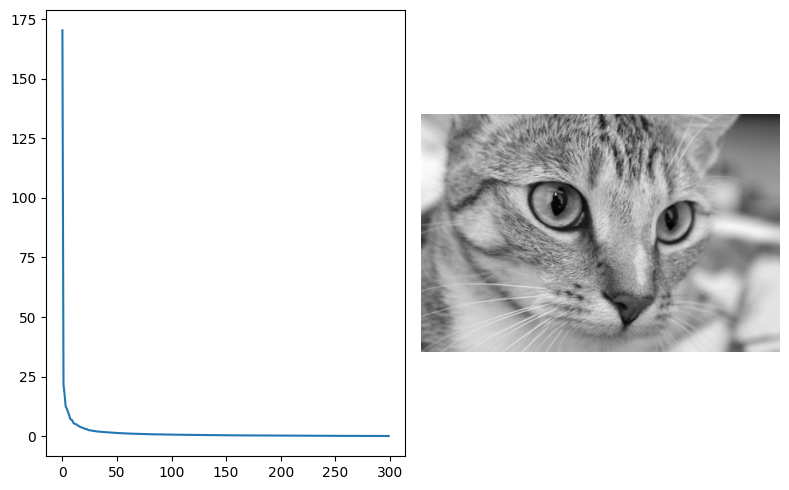

In [25]:
interact(compress_show_gray_images,img_name=list(gray_images.keys()),k=(1,300));

In [26]:
color_images = {
    "cat":img_as_float(data.chelsea()),
    "astro":img_as_float(data.astronaut()),
    "coffee":img_as_float(data.coffee())
}

In [27]:
def compress_show_color_images_reshape(img_name,k):
    """
     compress and display the reconstructed color image using the reshape method
    """
    image = color_images[img_name]
    original_shape = image.shape
    image_reshaped = image.reshape((original_shape[0],original_shape[1]*3))
    image_reconst,_ = calculo_svd(image_reshaped,k)
    image_reconst = image_reconst.reshape(original_shape)
    plt.imshow(image_reconst)

interactive(children=(Dropdown(description='img_name', options=('cat', 'astro', 'coffee'), value='cat'), IntSl…

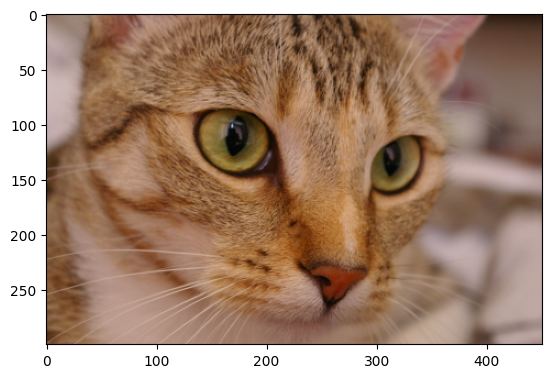

In [28]:
interact(compress_show_color_images_reshape,img_name=list(color_images.keys()),k=(0,512));

La SVD es una herramienta muy útil para la compresión de imágenes.

## 3) Modelado de tópicos
El objetivo de este ejercicio será extraer tópicos a partir de un conjunto de documentos usando la descomposición de valores singulares.

El modelado de tópicos nos ayuda a:
- explorar grandes cantidades de documentos
- encontrar clúster de plabras
- similitud entre documentos
- descubrir tópicos

Un **modelo de tópicos** tiene como objetivo identificar **relaciones latentes** entre documentos pertenecientes a una colección, con el fin de dar una descripción sucinta de ésta sin perder información.

Por ejemplo, si existe una colección de documentos que abarcan múltiples temas, **un tópico es un conjunto de PALABRAS** que logran describir cada uno de estos temas.




## Análisis semántico latente

El análisis semántico latente (LSA, por las siglas en ingles de Latent Semantic Analysis) es un modelo estadístico que se utiliza para **determinar las relaciones** entre una colección de documentos y los términos presentes en estos *n* documentos a  partir de obtener las relaciones semánticas entre las palabras.

La colección de documentos se representa como una matriz término-documento. Donde cada fila representa una palabra y cada columna un documento. La forma para determinar las relaciones es usando SVD.

En la figura se observa la matriz término-documento representa como una factorización de matrices (Imagen tomada de [Manthiramoorthi, 2020](https://medium.com/analytics-vidhya/nlp-with-latent-semantic-analysis-b3de6e16ad7d))




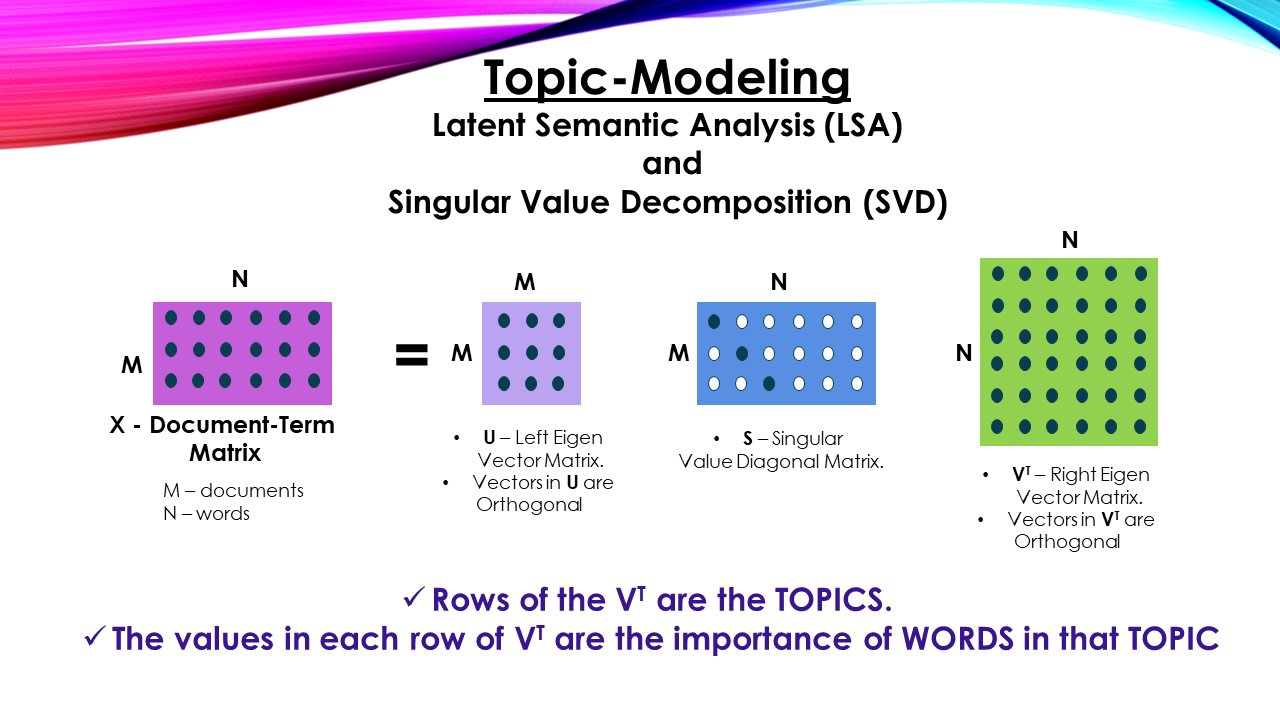


Para esta libreta se explorará las siguientes funciones:


1.   [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
2.   [TruncatedSVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html)
3. [Randomized_svd](https://scikit-learn.org/stable/modules/generated/sklearn.utils.extmath.randomized_svd.html)



In [29]:
#Carga de bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 200)

In [30]:
#Cargamos los datos "fetch_20newsgroups"
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
print("Total de docs",len(documents))

Total de docs 11314


In [31]:
print("--- Grupos de noticias ---\n", dataset.target_names)

--- Grupos de noticias ---
 ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


El dataset contiene 11,314 documentos distribuidos en 20 grupos de noticias diferentes

## Preprocesamiento del texto

In [32]:
#Pre-procesamiento de los documentos
pre_data = pd.DataFrame({'document':documents})
pre_data['clean_doc'] = pre_data['document'].str.replace("[^a-zA-Z#]", " ")#se remueve signos, caracteres especiales..
pre_data['clean_doc'] = pre_data['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])) #se remueve palabras cortas
pre_data['clean_doc'] = pre_data['clean_doc'].apply(lambda x: x.lower())#se convierte el texto a minúsculas.

In [33]:
#!pip3 install nltk
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

tokenized_doc = pre_data['clean_doc'].apply(lambda x: x.split())#tokenización
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])#eliminación de stop-words
detokenized_doc = []
for i in range(len(pre_data)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)
pre_data['clean_doc'] = detokenized_doc

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Creamos una matriz de documentos y términos usando TfidfVectorizer

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english',
                            max_features= 1000, # máximo número de términos
                            max_df = 0.95,
                            min_df=2,
                            smooth_idf=True)

X = vectorizer.fit_transform(pre_data['clean_doc'])
print("Tamaño de la matriz TD-IDF: ", X.shape) # visualizamos el tamaño de la matriz

Tamaño de la matriz TD-IDF:  (11314, 1000)


Tamaño esperado de las matrices resultantes de SVD dada la matriz término-documento (11314, 1000):

*   Matriz U (11314,11314)
*   Matriz sigma (11314,1000)
*   Matriz VT (1000,1000)





In [35]:
## Visualizando los términos obtenidos con TfidfVectorizer
terminos = vectorizer.get_feature_names_out()
print("Total de términos:", len(terminos))

Total de términos: 1000


In [36]:
print("Lista de términos:", terminos)

Lista de términos: ['00' '000' '01' '02' '04' '0d' '0t' '10' '100' '11' '12' '13' '14' '145'
 '15' '16' '17' '18' '19' '1990' '1991' '1992' '1993' '1d9' '1t' '20' '21'
 '22' '23' '24' '25' '27' '2di' '2tm' '30' '32' '34' '34u' '3t' '40' '45'
 '50' '500' '55' '6ei' '6um' '75' '75u' '7ey' '7u' '80' '800' '90' '91'
 '92' '93' '9v' 'a86' 'ability' 'able' 'ac' 'accept' 'access' 'according'
 'account' 'action' 'actually' 'added' 'addition' 'address'
 'administration' 'advance' 'ago' 'agree' 'ah' 'air' 'algorithm' 'allow'
 'allowed' 'allows' 'alt' 'amendment' 'america' 'american' 'americans'
 'analysis' 'anonymous' 'answer' 'answers' 'anti' 'anybody' 'apparently'
 'appear' 'appears' 'apple' 'application' 'applications' 'apply'
 'appreciate' 'appreciated' 'approach' 'appropriate' 'april' 'arab'
 'archive' 'area' 'areas' 'argument' 'arguments' 'armenia' 'armenian'
 'armenians' 'arms' 'army' 'article' 'articles' 'asked' 'asking' 'assume'
 'atheism' 'atheists' 'attack' 'attempt' 'au' 'author' 'au

Calculamos la descomposición de valores singulares de la matriz, usando la función [TruncatedSVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) de scikit-learn

## Análisis de la versión truncada de SVD

In [37]:
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=20, #Dimensionalidad deseada de los datos de salida.
                         algorithm='randomized',
                         n_iter=100, random_state=122)
svd_model.fit_transform(X)

array([[ 0.11832564, -0.08377116, -0.03350422, ...,  0.11469454,
         0.07558473, -0.06075641],
       [ 0.16449175, -0.03777703, -0.04501981, ..., -0.05186902,
        -0.05528296,  0.06473642],
       [ 0.16285867, -0.06479018, -0.05325619, ...,  0.1841378 ,
         0.14521268, -0.15998711],
       ...,
       [ 0.11181047, -0.03046925,  0.0631588 , ...,  0.02299143,
         0.02670815,  0.00146413],
       [ 0.09221411,  0.01867148, -0.01511413, ..., -0.03241063,
         0.04735998,  0.01402434],
       [ 0.32723939, -0.07847309,  0.17156603, ...,  0.07950354,
         0.09202167, -0.062848  ]])

In [38]:
print("-- Analizando el tamaño de las matrices ---")
print("Sigma: ",svd_model.singular_values_.shape)
print("VT: ",svd_model.components_.shape)
#print("U: ") ??

-- Analizando el tamaño de las matrices ---
Sigma:  (20,)
VT:  (20, 1000)


La versión truncada de scikit-learn devuelve U @ Sigma

Tamaño que retorna la función de [linalg.svd](https://github.com/scikit-learn/scikit-learn/blob/36958fb240fbe435673a9e3c52e769f01f36bec0/sklearn/utils/extmath.py#L250) dada la matriz término-documento (11314, 1000):

*   Matriz U (11314,11314) => (11314,20)
*   Matriz sigma (11314,1000) => (20)
*   Matriz VT (1000,1000) => (20,1000)

In [39]:
#Cálculo de SVD usando randomized_svd
from sklearn.utils.extmath import randomized_svd
U, Sigma, VT = randomized_svd(X,
                              n_components=20, #Dimensionalidad deseada de los datos de salida.
                              n_iter=100,
                              random_state=122)

In [40]:
print("-- Analizando el tamaño de las matrices ---")
print("U: ",U.shape)
print("Sigma: ",Sigma.shape)
print("VT: ",VT.shape)

-- Analizando el tamaño de las matrices ---
U:  (11314, 20)
Sigma:  (20,)
VT:  (20, 1000)


## **Recordemos:** las filas de la matriz VT son los tópicos identificados

In [41]:
#Analizando las profundidades de model.components_
for topic_idx, topic in enumerate(svd_model.components_):
  print("Número de tópico:",topic_idx)
  print("topic:", len(topic))

Número de tópico: 0
topic: 1000
Número de tópico: 1
topic: 1000
Número de tópico: 2
topic: 1000
Número de tópico: 3
topic: 1000
Número de tópico: 4
topic: 1000
Número de tópico: 5
topic: 1000
Número de tópico: 6
topic: 1000
Número de tópico: 7
topic: 1000
Número de tópico: 8
topic: 1000
Número de tópico: 9
topic: 1000
Número de tópico: 10
topic: 1000
Número de tópico: 11
topic: 1000
Número de tópico: 12
topic: 1000
Número de tópico: 13
topic: 1000
Número de tópico: 14
topic: 1000
Número de tópico: 15
topic: 1000
Número de tópico: 16
topic: 1000
Número de tópico: 17
topic: 1000
Número de tópico: 18
topic: 1000
Número de tópico: 19
topic: 1000


In [42]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(5, 4, figsize=(30, 15), sharex=True)
    axes = axes.flatten()

    if title == "TruncatedSVD":
      model = model.components_ # components_ es la matriz VT
    else:
      model = model
    for topic_idx, topic in enumerate(model):

        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1] #Returns the indices that sort a tensor along a given dimension in ascending order by value.
        #print("top_features_ind:",top_features_ind)

        top_features = [feature_names[i] for i in top_features_ind] #devuelve la palabra basada en el índice
        #print("top_features:",top_features)

        weights = topic[top_features_ind]
        #print("weights:",len(weights))

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        #ax.set_title(f"Topico: {dataset.target_names[topic_idx]} ", fontdict={"fontsize": 20}) #{topic_idx +1}
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=10)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.70, hspace=0.3)

--- Visualizando tópicos con TruncatedSVD ---


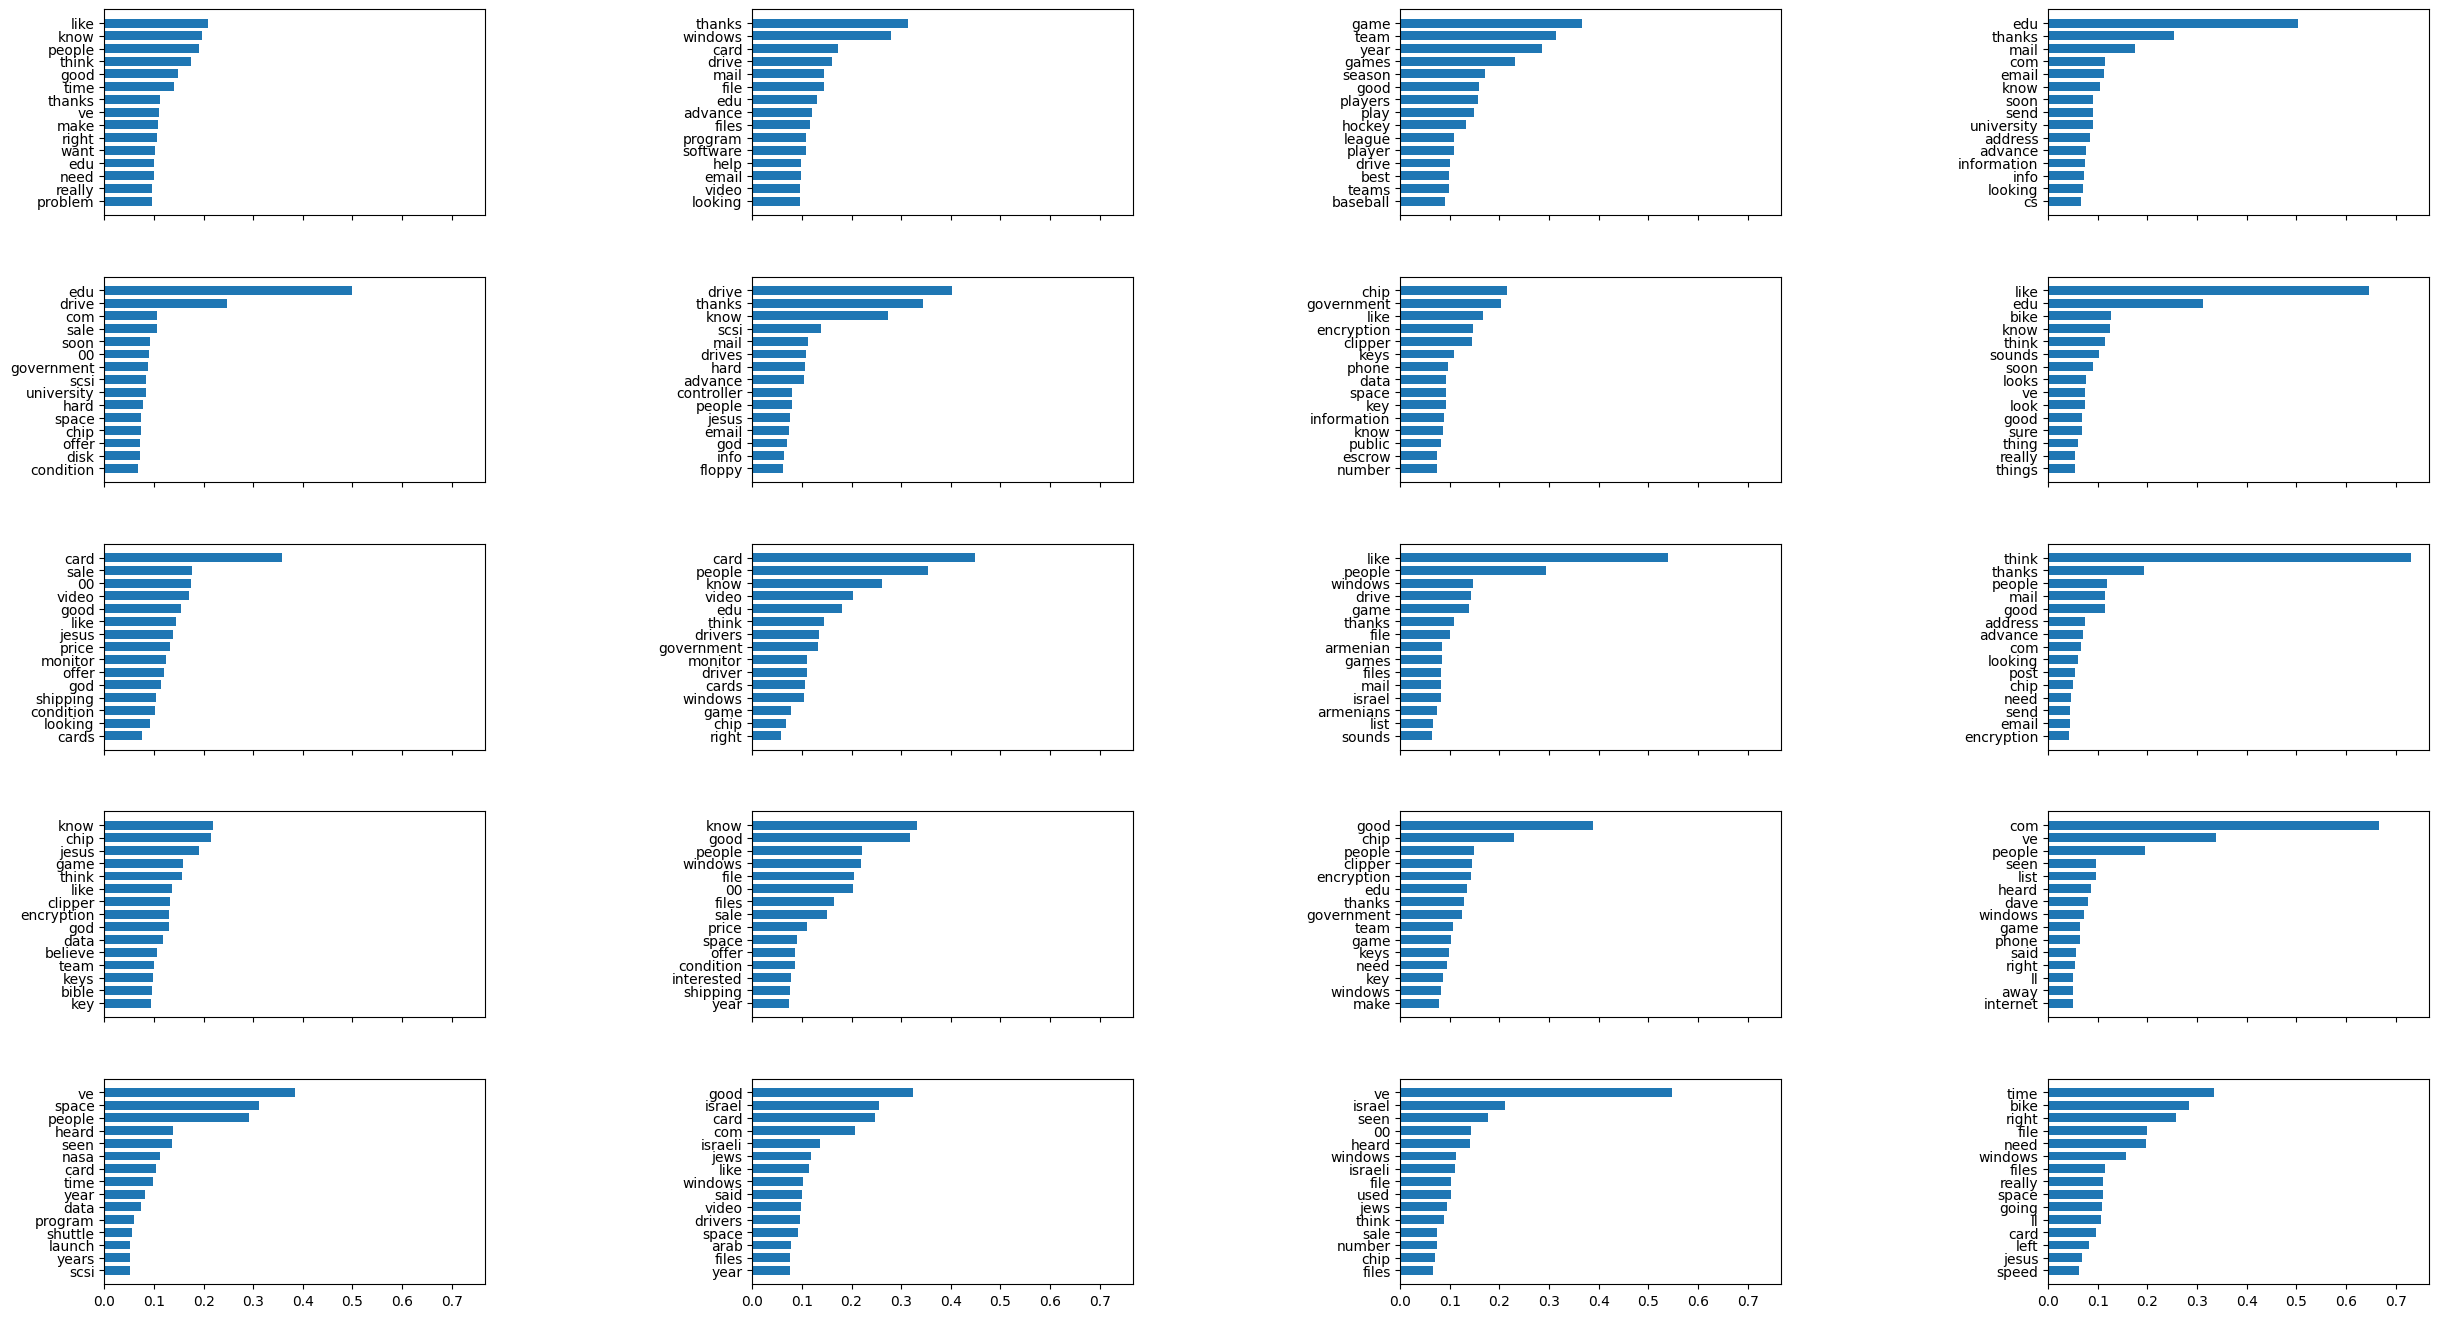

In [43]:
print("--- Visualizando tópicos con TruncatedSVD ---")
plot_top_words(svd_model, terminos, 15, "TruncatedSVD")

--- Visualizando tópicos con VT ---


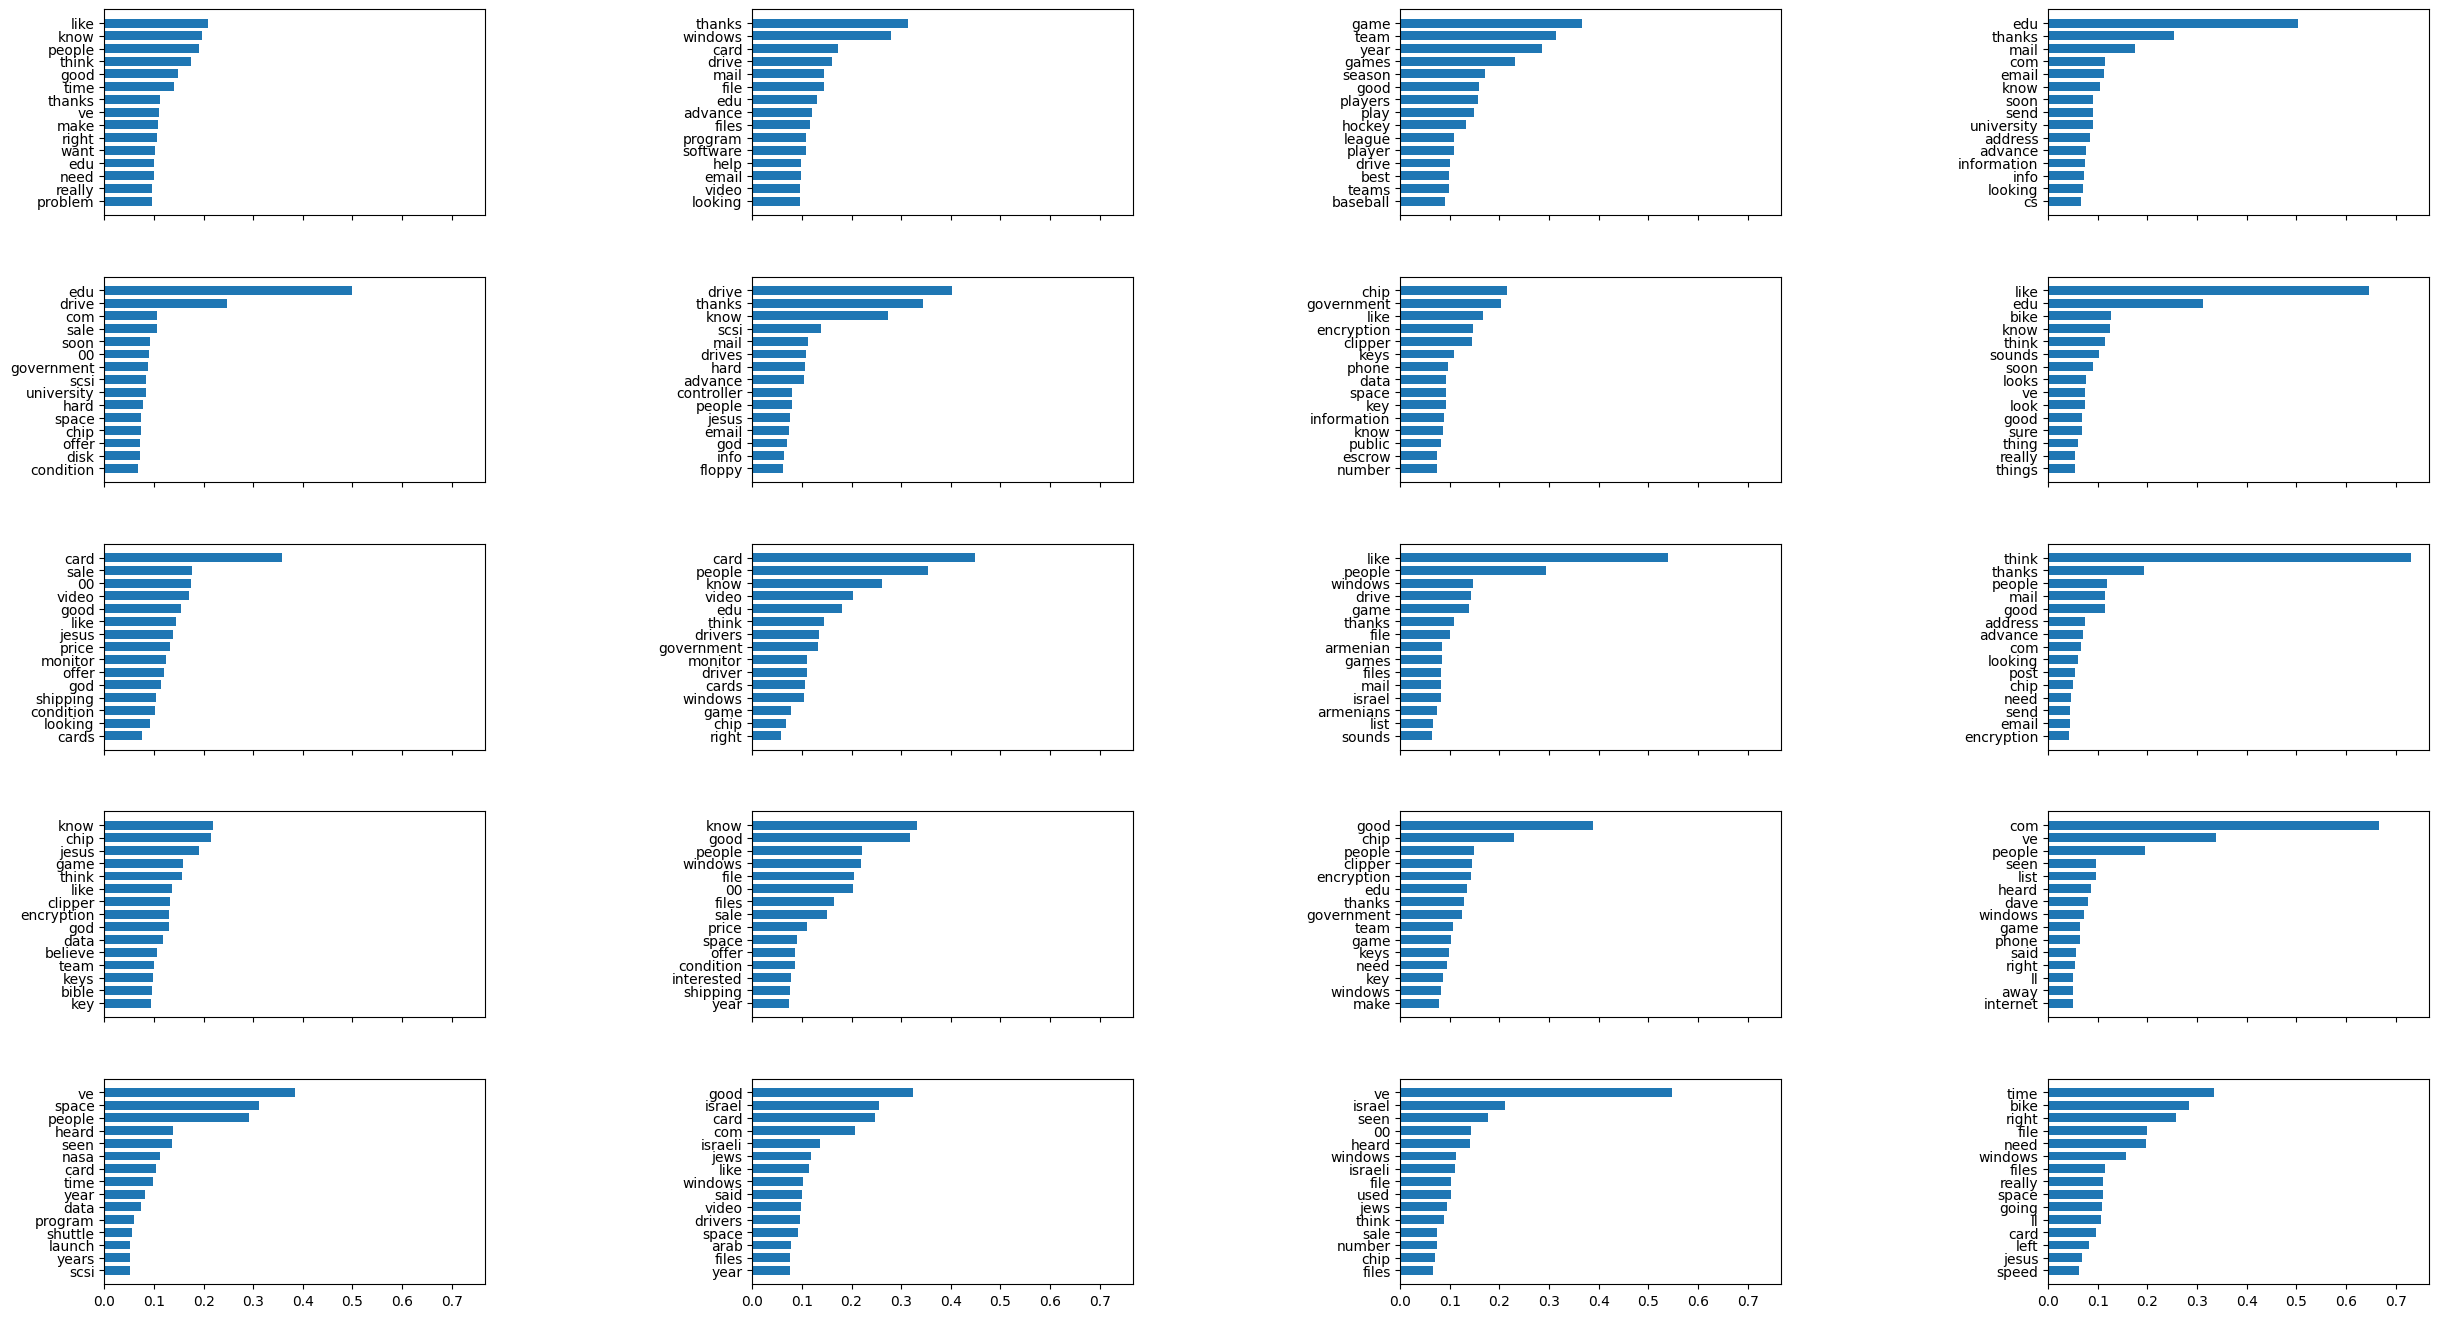

In [44]:
print("--- Visualizando tópicos con VT ---")
plot_top_words(VT, terminos, 15, "VT")